## Basic Visualizations
Performing some basic statistics on the dataset to get a better understanding of it. The results are on the preprocessed data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("../data/assignment_preprocessed.csv")
columns = dataset.columns

In [4]:
dataset.head(5)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm,decade
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,-1,-1,-1,-1,-1,-1,-1,-1,352.73,2000
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,0,1,1,0,0,1,0,1,856.70,1990
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,-1,1,-1,-1,-1,-1,-1,-1,1562.50,2000
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,1,0,0,0,0,0,2421.05,2000
4,36078547,116.5,8906.0,northern sub,291,970000,2010,ground-floor,maisonette,3,...,0,1,1,0,0,0,0,1,3333.33,2010


In [5]:
print('Shape of Dataset:', dataset.shape)

Shape of Dataset: (9860, 54)


In [6]:
dataset.dtypes

id                        int64
ranking_score           float64
agent_id                float64
geography_name           object
sq_meters                 int64
price                     int64
year_of_construction      int64
floor                    object
subtype                  object
rooms                     int64
no_of_bathrooms           int64
no_of_wc                  int64
ad_type                  object
living_rooms              int64
kitchens                  int64
balcony_area              int64
lux_home                  int64
new_development           int64
garage                    int64
furnished                 int64
preserved                 int64
investment                int64
unfinished                int64
heating_under_floor       int64
renovated                 int64
requires_renovation       int64
airy                      int64
bright                    int64
painted                   int64
garden                    int64
ac                        int64
storage 

In [7]:
# check how many entries are empty in a specific column
dataset.isnull().sum()

id                      0
ranking_score           0
agent_id                0
geography_name          0
sq_meters               0
price                   0
year_of_construction    0
floor                   0
subtype                 0
rooms                   0
no_of_bathrooms         0
no_of_wc                0
ad_type                 0
living_rooms            0
kitchens                0
balcony_area            0
lux_home                0
new_development         0
garage                  0
furnished               0
preserved               0
investment              0
unfinished              0
heating_under_floor     0
renovated               0
requires_renovation     0
airy                    0
bright                  0
painted                 0
garden                  0
ac                      0
storage                 0
balcony                 0
internal_stairs         0
view                    0
secure_door             0
penthouse               0
alarm                   0
corner      

In [9]:
dataset.describe()

,id,ranking_score,agent_id,sq_meters,price,year_of_construction,rooms,no_of_bathrooms,no_of_wc,living_rooms,...,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm,decade
count,9.860000e+03,9860.000000,9860.000000,9860.000000,9.860000e+03,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,...,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000,9860.000000
mean,4.114532e+07,115.946014,11409.848884,183.085903,5.182294e+05,1997.873935,2.783469,1.590162,0.587221,0.501420,...,-0.294118,0.456897,0.306389,-0.164300,0.063895,-0.214706,-0.156694,-0.161055,2802.965710,1993.733266
std,2.219717e+06,31.548475,3109.642332,137.420293,4.475579e+05,38.391984,1.342718,1.118265,0.607288,0.633528,...,0.574067,0.705756,0.766699,0.624404,0.712839,0.526647,0.588536,0.635547,1445.678297,37.989165
min,3.464630e+07,23.500000,5976.000000,12.000000,8.000000e+03,1901.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,222.220000,1900.000000
25%,4.019834e+07,93.400000,9161.000000,88.000000,2.000000e+05,1976.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,1845.640000,1970.000000
50%,4.205591e+07,120.000000,11055.000000,140.000000,3.800000e+05,1995.000000,3.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2544.250000,1990.000000
75%,4.279827e+07,141.000000,13047.500000,240.000000,6.900000e+05,2009.000000,4.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3437.500000,2000.000000
max,4.346410e+07,181.900000,19984.000000,3000.000000,2.600000e+06,2155.000000,10.000000,5.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16304.350000,2150.000000


In [10]:
# get number of unique values per column
dataset.nunique()

id                      9860
ranking_score           1354
agent_id                 518
geography_name             4
sq_meters                485
price                    518
year_of_construction      99
floor                     14
subtype                   10
rooms                     11
no_of_bathrooms            6
no_of_wc                   3
ad_type                    4
living_rooms               4
kitchens                   3
balcony_area              51
lux_home                   3
new_development            3
garage                     3
furnished                  3
preserved                  3
investment                 3
unfinished                 3
heating_under_floor        3
renovated                  3
requires_renovation        3
airy                       3
bright                     3
painted                    3
garden                     3
ac                         3
storage                    3
balcony                    3
internal_stairs            3
view          

## Stats on Subtypes

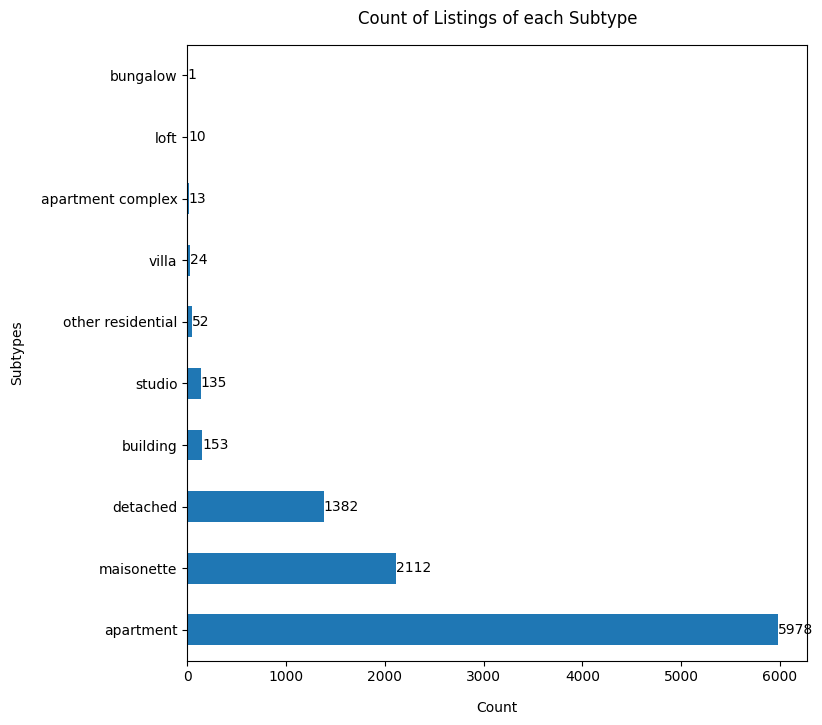

In [12]:
# bar chart of counts for subtypes of houses
ax = dataset['subtype'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Subtypes", labelpad=12)
plt.title("Count of Listings of each Subtype", y=1.02);

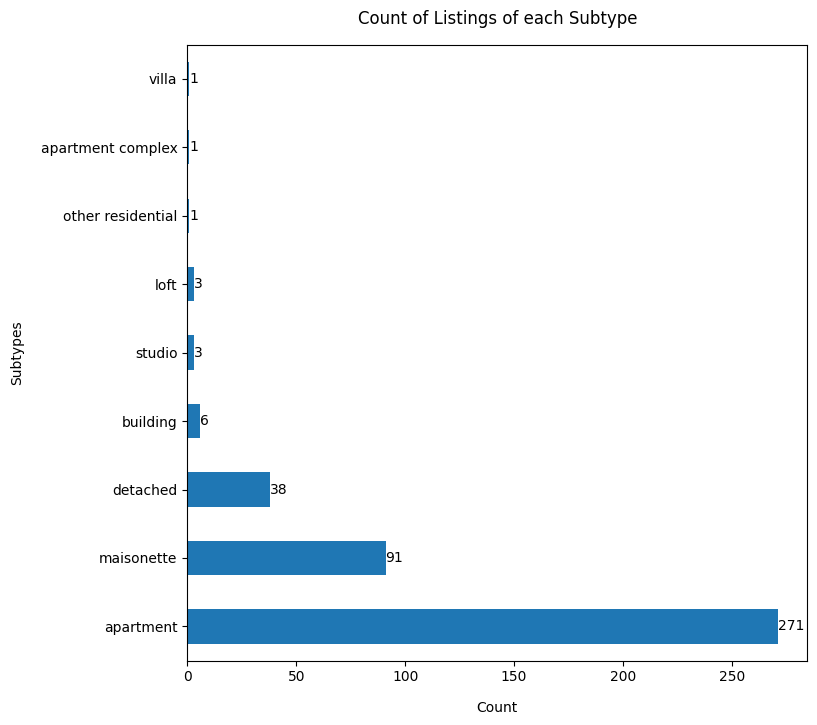

In [15]:
ax = dataset[dataset['year_of_construction']==2155]['subtype'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Subtypes", labelpad=12)
plt.title("Listings Under Construction per subtype", y=1.02);

## Stats on Geography Name

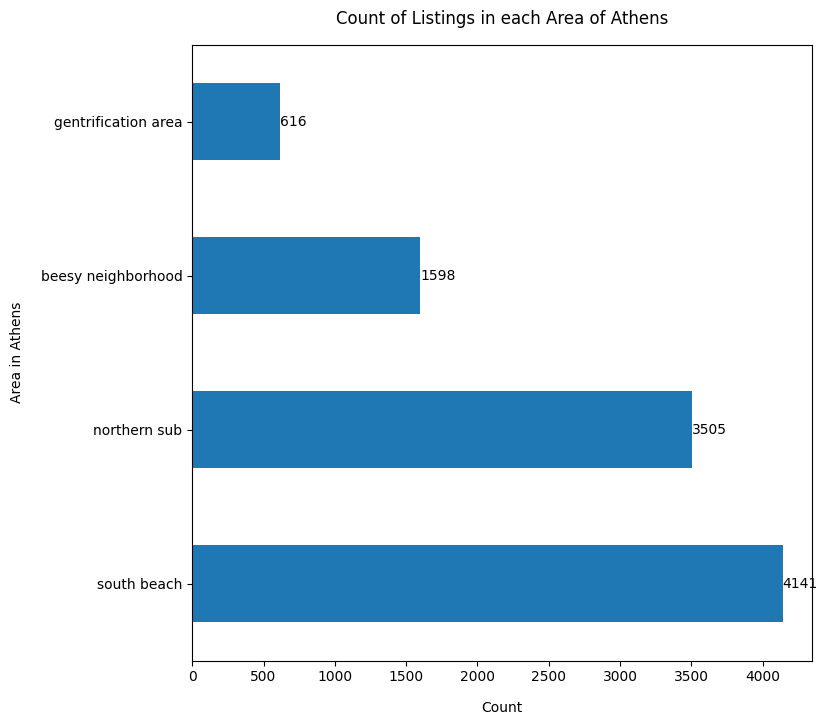

In [13]:
# bar chart of counts for listeings in each area
ax = dataset['geography_name'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Area in Athens", labelpad=12)
plt.title("Count of Listings in each Area of Athens", y=1.02);

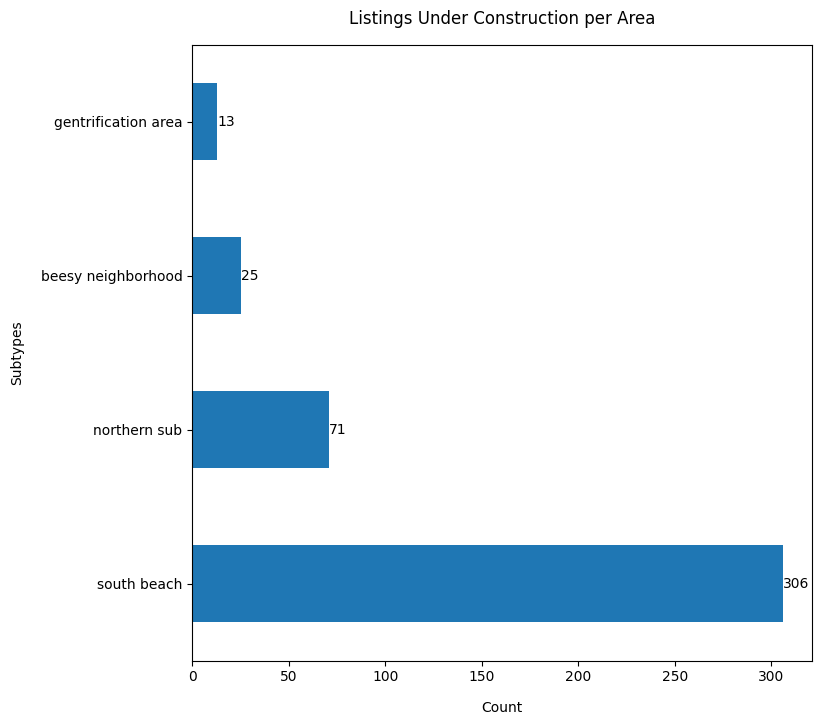

In [16]:
ax = dataset[dataset['year_of_construction']==2155]['geography_name'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Subtypes", labelpad=12)
plt.title("Listings Under Construction per Area", y=1.02);

## Stats on Decade

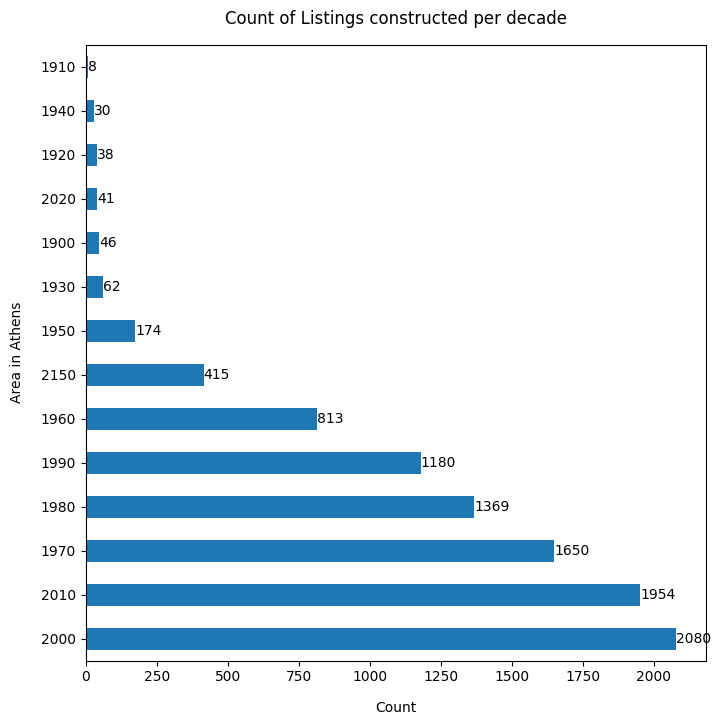

In [17]:
# bar chart of counts for listeings in each area
ax = dataset['decade'].value_counts().plot.barh(figsize=(8, 8))
ax.bar_label(ax.containers[0])
plt.xlabel("Count", labelpad=12)
plt.ylabel("Area in Athens", labelpad=12)
plt.title("Count of Listings constructed per decade", y=1.02);